# 1. cluster_blobs.csv

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '6'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
blobs = pd.read_csv("./cluster_blobs.csv")
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


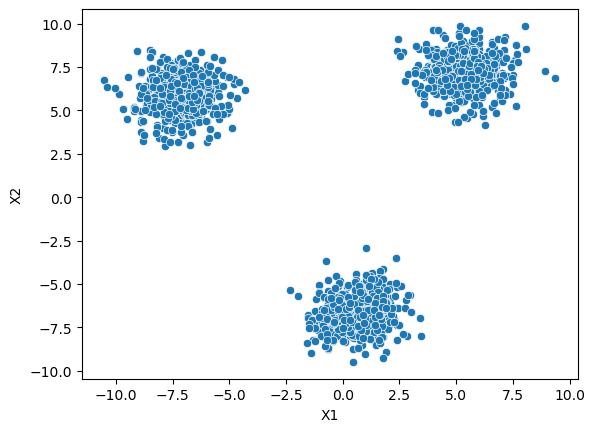

In [4]:
sns.scatterplot(x="X1", y="X2", data = blobs)
plt.show()

# 2. cluster_moons.csv

In [5]:
moons = pd.read_csv("./cluster_moons.csv")
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


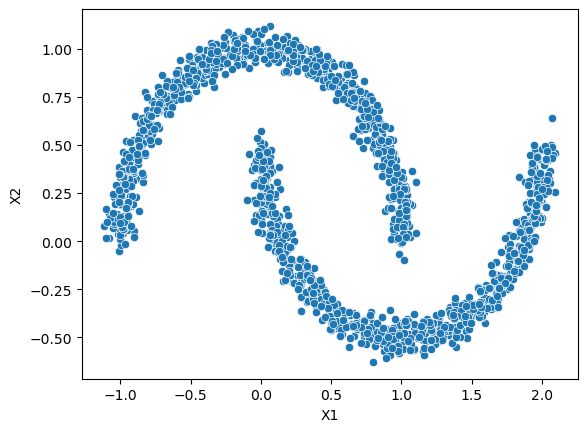

In [6]:
sns.scatterplot(x="X1", y="X2", data = moons)
plt.show()

# 3. cluster_circles.csv

In [7]:
circles = pd.read_csv("./cluster_circles.csv")
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


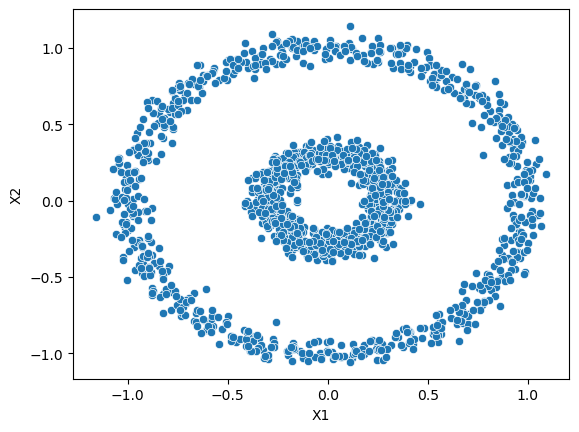

In [8]:
sns.scatterplot(x="X1", y="X2", data = circles)
plt.show()

# 4. 用於顯示群集的散佈圖

In [9]:
def display_mode(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(x="X1", y="X2", hue = labels, data = data, palette="Set1")
    plt.show()

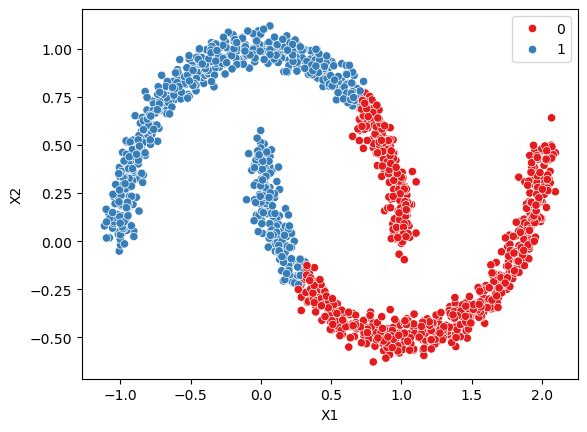

In [10]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, init='k-means++', n_init='auto')
display_mode(model, moons)

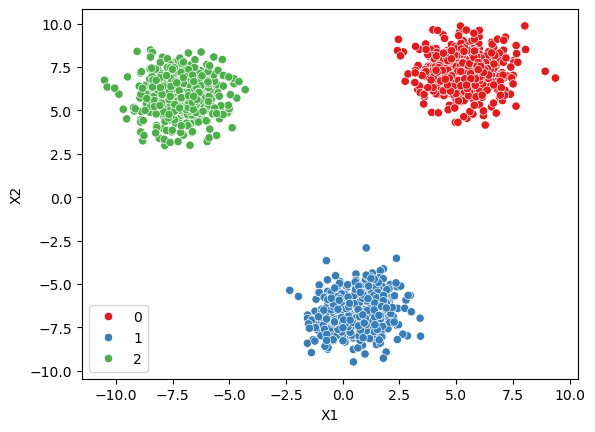

In [11]:
model = KMeans(n_clusters = 3, init='k-means++', n_init='auto')
display_mode(model, blobs)

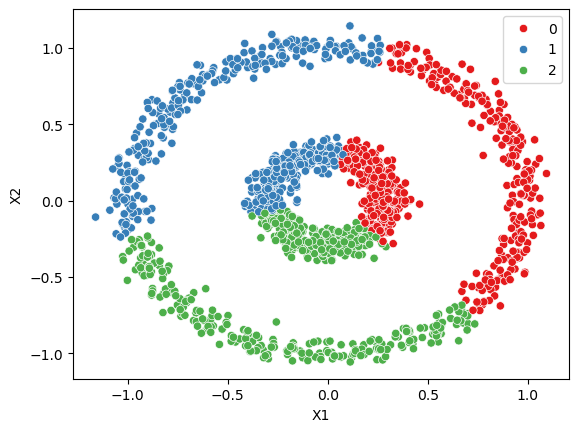

In [12]:
model = KMeans(n_clusters = 3, init='k-means++', n_init='auto')
display_mode(model, circles)

# 5. DBSCAN 

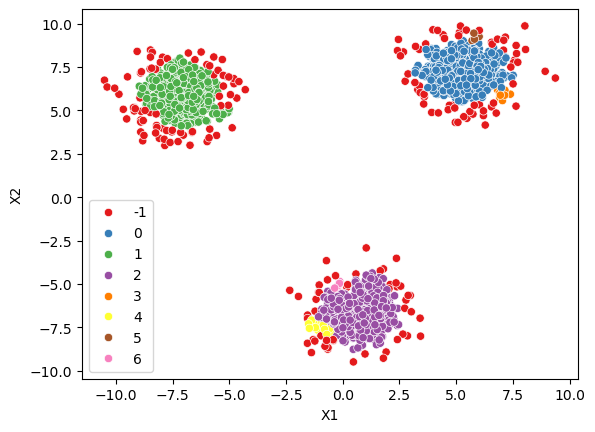

In [13]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 0.3)
display_mode(model, blobs)

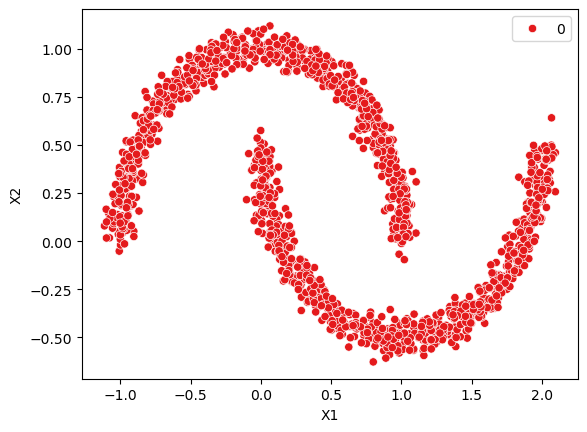

In [14]:
model = DBSCAN(eps = 0.3)
display_mode(model, moons)

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score  # 輪廓係數
import numpy as np
# silhouette_score 越大越好
silhouette_scores = []
eps_values = np.arange(0.1, 3.0, 0.1)
for eps in eps_values:
    testModel = DBSCAN(eps = eps)
    y_km = testModel.fit_predict(blobs)
    if len(set(y_km)) > 1:
        silhouette_scores.append(silhouette_score(blobs, y_km))
    else:
        silhouette_scores.append(-1)
baset_index = np.argmax(silhouette_scores)
bast_eps = eps_values[baset_index]
bast_score = silhouette_scores[baset_index]
print(f"bast_eps: {bast_eps} bast_score: {bast_score}")

bast_eps: 1.5000000000000002 bast_score: 0.8625486425630479


In [16]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score  # 輪廓係數
import numpy as np
def test_bast_eps(data):
    # silhouette_score 越大越好
    silhouette_scores = []
    eps_values = np.arange(0.1, 3.0, 0.1)
    for eps in eps_values:
        testModel = DBSCAN(eps = eps)
        y_km = testModel.fit_predict(data)
        if len(set(y_km)) > 1:
            silhouette_scores.append(silhouette_score(data, y_km))
        else:
            silhouette_scores.append(-1)
    baset_index = np.argmax(silhouette_scores)
    bast_eps = eps_values[baset_index]
    bast_score = silhouette_scores[baset_index]
    print(f"bast_eps: {bast_eps} bast_score: {bast_score}")

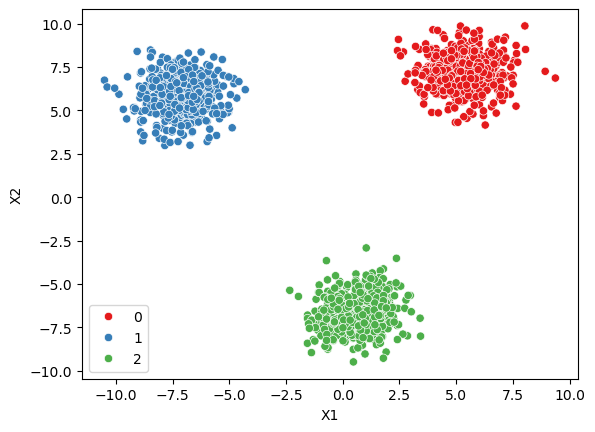

In [17]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 1.5)
display_mode(model, blobs)

In [18]:
test_bast_eps(moons)

bast_eps: 0.2 bast_score: 0.33344160813873897


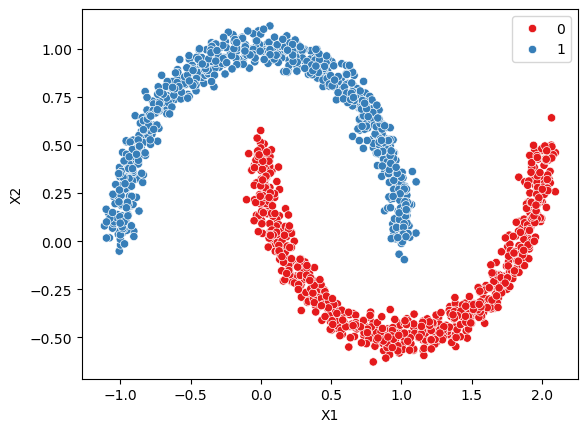

In [19]:
model = DBSCAN(eps = 0.2)
display_mode(model, moons)

In [20]:
test_bast_eps(circles)

bast_eps: 0.2 bast_score: 0.20829174427109967


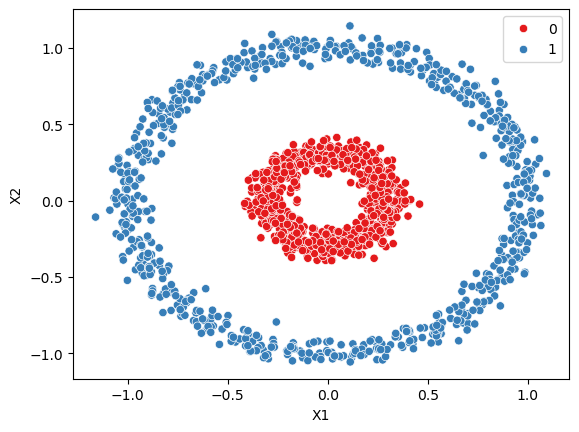

In [21]:
model = DBSCAN(eps = 0.2)
display_mode(model, circles)

# 6. 自我訓練(Self-training)測試

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.semi_supervised import SelfTrainingClassifier

In [23]:
X, y = datasets.load_iris(return_X_y = True)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 7. 設定約50%資料沒有標註(-1)

In [25]:
print(X_train.shape, y_train.shape)
rng = np.random.RandomState(42)
y_rand = rng.rand(y_train.shape[0]) # 均勻分布亂數

(120, 4) (120,)


In [26]:
y_50 = np.copy(y_train)
y_50[y_rand < 0.5] = -1
print(len(y_50[y_50 == -1]))
print(len(y_train))

62
120


In [27]:
base_class = SVC(kernel="rbf", gamma = 0.5)
base_class.fit(X_train, y_50)
base_class.score(X_test, y_test)

0.3333333333333333

In [28]:
base_class = SVC(kernel="rbf", gamma = 0.5, probability = True)
clf = SelfTrainingClassifier(base_class).fit(X_train, y_50)
clf.score(X_test, y_test)

1.0

# 8. 標註傳播(Label propagation)測試

In [29]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation

In [30]:
X, y = make_classification(n_samples = 1000, n_features = 2, n_informative = 2, n_redundant = 0, random_state = 1)
print(X)
# n_features = 2，表示總共只有2個特徵。
# n_informative = 2，表示2個特徵都是真正「有用」來決定類別的
# n_redundant 表示沒有無用的特徵。

[[ 0.86341137 -0.91235445]
 [-0.53099717  0.90118241]
 [ 0.98277596 -1.59111159]
 ...
 [ 1.33019532  3.72180951]
 [-1.01084076  0.42633933]
 [-1.00873243  1.24540194]]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1, stratify = y)
# stratify = y，表示要依照y的類別來分配訓練集和測試集。
# 使用 stratify = y 時，train_test_split 會在切分前根據原始y中各類別的比例做分層抽樣，因此切分出來的訓練集和測試集裡，各類別的比例會盡可能與原始資料一致。

In [32]:
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size = 0.5, random_state = 1, stratify = y_train)
X_train_mixed = np.concatenate((X_train_lab, X_test_unlab))
noLabel = [-1 for _ in range(len(y_test_unlab))]
y_train_mixed = np.concatenate((y_train_lab, noLabel))
y_train_mixed.shape

(500,)

# 9. LogisticRegression 模型訓練與評估基準點

In [33]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(X_train_mixed, y_train_mixed)
clf2.score(X_test, y_test)

0.23

# 10. LabelSpreading 測試

In [34]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading

In [35]:
X, y = make_classification(n_samples = 1000, n_features = 2, n_informative = 2, n_redundant = 0, random_state = 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1, stratify = y)
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size = 0.5, random_state = 1, stratify = y_train)
# 在分割 50 筆資料給 -1 標記為無標籤
X_train_mixed = np.concatenate((X_train_lab, X_test_unlab))
nolabel = [-1 for _ in range(len(y_test_unlab))]
y_train_mixed = np.concatenate((y_train_lab, nolabel))
y_train_mixed.shape

(500,)

# 11. LabelSpreading 模型訓練與評估

In [36]:
clf = LabelSpreading()
clf.fit(X_train_mixed, y_train_mixed)
clf.score(X_test, y_test)

0.866

# 12. 影像壓縮 (Image Compression)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

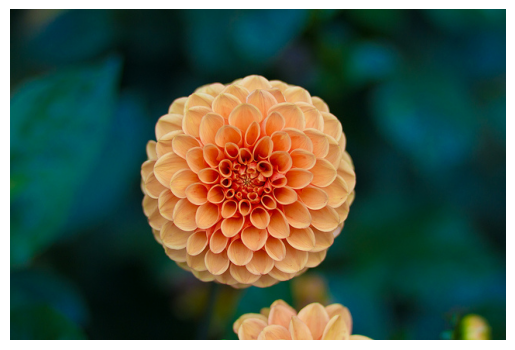

In [38]:
flower = load_sample_image('flower.jpg')
plt.axis('off')
plt.imshow(flower)

# 13. 正規化、取得圖片寬高及顏色維度、將寬高轉為一維

In [39]:
flower = np.array(flower, dtype = np.float64) / 255
w, h, d = tuple(flower.shape)
# 將寬高轉為一維
image_array = np.reshape(flower, (w * h, d))
w, h, d, image_array.shape  # 3個維度RGB

(427, 640, 3, (273280, 3))

# 14. 模型訓練及預測

In [40]:
# 隨機抽樣 1000 個像素
image_sample = shuffle(image_array, random_state = 42)[:1000]

# K-Means 模型訓練，設定64個集群
kmeans = KMeans(n_clusters = 64, random_state = 42).fit(image_sample)

# 對所有像素進行集群
labels = kmeans.predict(image_array)

c:\Users\hankc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [41]:
def reconstruct_image(cluster_centers, labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w, h, d))
    label_index = 0
    for i in range(w):
        for j in range(h):
            # 以質心取代原圖像顏色
            # cluster_centers 對映到64個顏色
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1
    return image

w: 427 h: 640 labels: [51 12 51 ... 27 27 27]


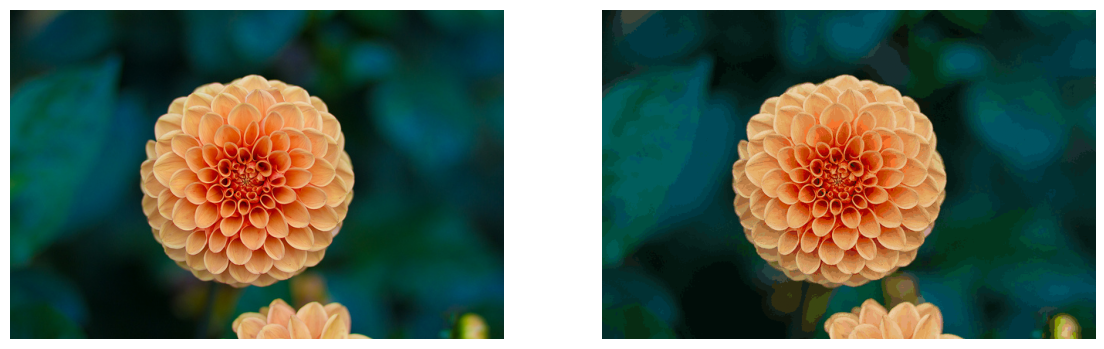

In [42]:
plt.figure(figsize = (14,7))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(flower)
plt.subplot(1,2,2)
plt.axis('off')
print("w:", w, "h:", h, "labels:", labels)
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h))